In [81]:
import pandas as pd
import numpy as np
import random
import nltk
import time
import re
from nltk import ngrams
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from gensim.summarization import summarize
from textacy.preprocess import preprocess_text

In [82]:
# combine scraped data from all food blogs into one

In [83]:
df1 = pd.read_pickle('tamchiak.pickle')
df2 = pd.read_pickle('singaporefoodie.pickle')
df3 = pd.read_pickle('rubbisheat.pickle')
df4 = pd.read_pickle('rantingpanda.pickle')
df5 = pd.read_pickle('ordinarypatrons.pickle')
df6 = pd.read_pickle('ladyironchef.pickle')
df7 = pd.read_pickle('ieatishoot.pickle')
df8 = pd.read_pickle('hungrygeek.pickle')
df9 = pd.read_pickle('hungrybird.pickle')
df10 = pd.read_pickle('hawkerfood.pickle')
df11 = pd.read_pickle('gninethree.pickle')
df12 = pd.read_pickle('eatbook.pickle')
df13 = pd.read_pickle('daniel.pickle')
df14 = pd.read_pickle('chosenglutton.pickle')
df15 = pd.read_pickle('ieatandeat.pickle')

In [84]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15], ignore_index=True)

In [85]:
df.head()

,Title,Details,Date,Processed Summary,Processed Detail
0,Great Deals That Reward You When Dining With P...,"Singapore might be known for many things, but ...","Oct 31st, 2017",great deal reward dining paradise group,known thing stand colourful scene flavour borr...
1,10 Exciting Highlights at AccorHotels Food & W...,"\n AccorHotels, the largest and most prestigio...","Oct 31st, 2017",exciting highlight accorhotels wine festival,accorhotels largest prestigious hotel operator...
2,Man Man Unagi – Delicious Unagi that Received ...,Since the release of the Singapore Michelin Gu...,"Oct 30th, 2017",man man unagi delicious unagi received bib gou...,release michelin guide bib gourmand awardees q...
3,Kopi More – Brewing Traditional Nanyang Kopi W...,"Since I first opened my eyes, and heart, to th...","Oct 29th, 2017",kopi brewing traditional nanyang kopi espresso...,opened eye heart world coffee going looking go...
4,11 Finger-Licking-Good Biryanis That You Will ...,"In Indian culture, eating with your hands is a...","Oct 28th, 2017",fingerlickinggood biryani love,indian culture eating hand mark respect host s...


In [86]:
len(df)

2573

In [87]:
# Further cleaning of text based on wordcloud output

In [145]:
# compile list containing the string 'number'. To be added to stoplist
number_list=[]
for item in df['Processed Detail']:  
    t = re.findall('[A-z0-9+-~]*number[A-z0-9+-~]*', item)
    number_list.extend(t)

n_list = list(set(number_list))
print len(n_list)
print n_list

127
[u'number30pm~number30pm', u'usdnumber++to', u'susdnumber++slice', u'audusdnumber~susdnumber', u'rm3~susdnumber', u'usdnumber2k++', u'susdnumber+', u'thb100~susdnumber', u'thb240++susdnumber++', u'usdnumber++weekends', u'number|kg', u'rm880~susdnumber', u'usdnumber~usdnumber', u'~susdnumber', u'numberrf=number', u'rm11~susdnumber', u'thb360++~susdnumber++', u'usdnumber++usdnumber++usdnumber++', u'susdnumber++are', u'usdnumber++360g', u'usdusdnumber++', u'usdnumber++for', u'thb80~susdnumber', u'+number', u'rm15~susdnumber', u'rm270~susdnumber', u'susdnumber++number', u'beef+usdnumber', u'rm2250susdnumber+', u'thb800~susdnumber', u'rm60~susdnumber', u'rm1690~susdnumber++', u'rm1490~susdnumber', u'y=numbernumber', u'thb230~susdnumber', u'rm4452~susdnumber', u'usdnumber4k++', u'rm4~susdnumber', u'rm6~susdnumber', u'susdnumber++per', u'thb359~susdnumber', u'usdnumber++', u'rm46~susdnumber', u'susdnumber++one', u'susdnumber++', u'usdnumber++^', u'rm18~susdnumber', u'rm5~susdnumber', u'y=

In [146]:
stoplist = ['adsbygoogle', 'cdata', 'hour', 'tel', 'website', 'usdn', 'nearest', 'station', 'october', 'usd', \
            '=', '||', '<', '>', 'push', 'mon', 'tue', 'wed', 'thur', 'fri', '10am', '10pm', '11am', '11pm', \
            'facebook', 'instagram', 'travel', 'highlight', 'news', 'video', 'reviewed', 'unless', 'stated', \
           'danielfooddiary', 'misstamchiakcom', 'follow', 'update', 'simply', 'comment', 'community', 'let', 'help',\
           'additional', 'info', 'phone', 'url', 'anonymous', 'visit', 'paid', 'there', 'thanks', 'build', 'daniel',\
           'diary', 'overall', 'rating', 'featured', '3pm', '6pm', 'sat', 'sun', 'ordinary', 'patron', 'blog', \
            'review', 'verify', 'advance', 'eatbooksg', 'summary', 'pro', 'nathanael', 'written', 'ho', \
           ] + n_list

In [147]:
clean_details = []
for item in df['Processed Detail']:  
    Tokens = nltk.word_tokenize(item)
    t = [tok for tok in Tokens if tok not in stoplist]
    clean_details.append(' '.join(t))

In [148]:
len(clean_details)

2573

In [149]:
df['Processed Detail'] = clean_details

In [150]:
for item in df['Processed Detail']:  
    T = nltk.word_tokenize(item)
    for i in T:
        if i in stoplist:
            print i

In [151]:
# Calculate number of words(tokens) per document
word_count = []
for detail in df['Processed Detail']:
    count = len(detail.split())
    word_count.append(count)

In [152]:
df['Word_count'] = word_count

In [153]:
print 'Total number of records :', len(df)
print 'Total number of words :', sum(df['Word_count'])
print 'Average no. of words per record :', sum(df['Word_count'])/len(df)

Total number of records : 2573
Total number of words : 977149
Average no. of words per record : 379


In [154]:
# create word cloud
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

In [155]:
# combine all Details column docs into one message
message = ''
for row in df['Processed Detail']:
    message += ' ' + row 

In [157]:
# introduce a mask over the word cloud
# http://stackoverflow.com/questions/7911451/pil-convert-png-or-gif-with-transparency-to-jpg-without

icon = Image.open('food.png')
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

In [158]:
wc = WordCloud(font_path='AmaticSC-Bold.ttf', background_color="white", max_words=10000, mask=mask, 
               width=4000, height=100, max_font_size=100, random_state=42)

In [159]:
# generate word cloud
start = time.time()

wc.generate_from_text(message)
wc.recolor(color_func=color_func, random_state=3)
wc.to_file("foodblog-wordcloud.png")

end = time.time()
exe_time = (end - start) / 60
print 'Time taken : ', exe_time, ' minutes'

Time taken :  1.57812638283  minutes


In [160]:
# create Ngrams 
# tokenize message
tokens = nltk.word_tokenize(message)

In [161]:
# remember to start from top to refresh, else will get wrong results
# construct bigrams
bgs = ngrams(tokens, 2)
bgs = list(bgs)
bgs[:5]

[(u'known', u'thing'),
 (u'thing', u'stand'),
 (u'stand', u'colourful'),
 (u'colourful', u'scene'),
 (u'scene', u'flavour')]

In [162]:
# Calculate the frequency distribution of the bigrams
tfreq = nltk.FreqDist(bgs)
# sort the keys by its values
tkeys = sorted(tfreq, key=tfreq.__getitem__, reverse=True)
tvalues = sorted(tfreq.values(), reverse=True)

In [163]:
print tkeys[:10]
print tvalues[:10]

[(u'ice', u'cream'), (u'orchard', u'road'), (u'tanjong', u'pagar'), (u'salted', u'egg'), (u'hong', u'kong'), (u'chicken', u'rice'), (u'fried', u'chicken'), (u'new', u'restaurant'), (u'dim', u'sum'), (u'pork', u'belly')]
[835, 700, 688, 665, 664, 659, 576, 529, 528, 478]


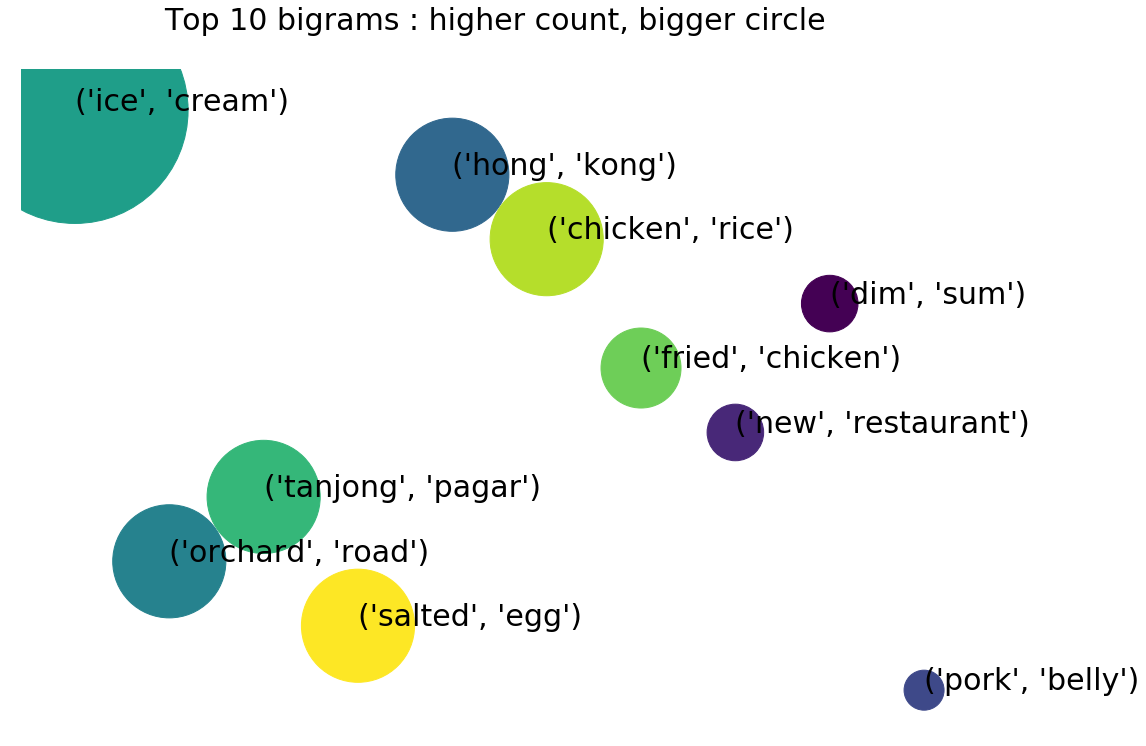

In [164]:
# Plot the top 10 bigrams
t = [tuple(map(str,x)) for x in tkeys[:10]]
x = range(len(t))
y = range(len(t))
random.shuffle(y)
# s sets the size of the circles given their respective counts
s = [50*(2**(n/80)) for n in tvalues[:10]]

colour = np.arange(5,len(t)+5)
random.shuffle(colour)
fig = plt.figure(figsize=(17,12))
ax = fig.gca()
ax.scatter(x, y, s=s, c=colour)
ax.axis('off')
plt.title('Top 10 bigrams : higher count, bigger circle\n').set_fontsize(30)

for i, txt in enumerate(t):
    ax.annotate(txt, (x[i],y[i])).set_fontsize(30)
    
plt.show()

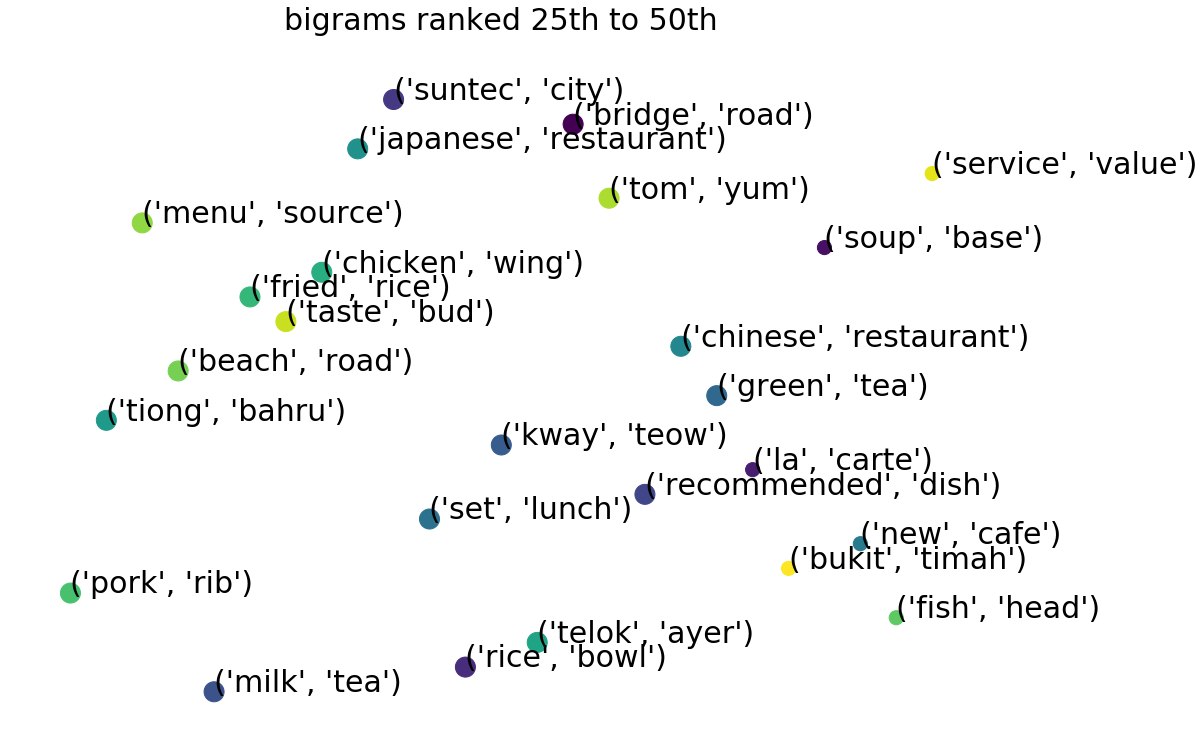

In [165]:
t = [tuple(map(str,x)) for x in tkeys[25:50]]
x = range(len(t))
y = range(len(t))
random.shuffle(y)
s = [50*(2**(n/80)) for n in tvalues[25:50]]

colour = np.arange(5,len(t)+5)
random.shuffle(colour)
fig = plt.figure(figsize=(17,12))
ax = fig.gca()
ax.scatter(x, y, s=s, c=colour)
ax.axis('off')
plt.title('bigrams ranked 25th to 50th\n').set_fontsize(30)

for i, txt in enumerate(t):
    ax.annotate(txt, (x[i],y[i])).set_fontsize(30)
    
plt.show()

In [166]:
# construct trigrams
tgs = ngrams(tokens, 3)
tgs = list(tgs)
tgs[:5]

[(u'known', u'thing', u'stand'),
 (u'thing', u'stand', u'colourful'),
 (u'stand', u'colourful', u'scene'),
 (u'colourful', u'scene', u'flavour'),
 (u'scene', u'flavour', u'borrowed')]

In [167]:
tfreq = nltk.FreqDist(tgs)
#sort the keys by its values
tkeys = sorted(tfreq, key=tfreq.__getitem__, reverse=True)
tvalues = sorted(tfreq.values(), reverse=True)

In [168]:
print tkeys[:10]
y = range(len(tkeys[:10]),0,-1)
print y
print tvalues[:10]

[(u'ang', u'mo', u'kio'), (u'salted', u'egg', u'yolk'), (u'service', u'value', u'atmosphere'), (u'value', u'atmosphere', u'top'), (u'marina', u'bay', u'sand'), (u'people', u'looking', u'place'), (u'east', u'coast', u'road'), (u'meal', u'stall', u'change'), (u'yong', u'tau', u'foo'), (u'bak', u'kut', u'teh')]
[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
[285, 265, 220, 219, 202, 190, 190, 183, 172, 168]


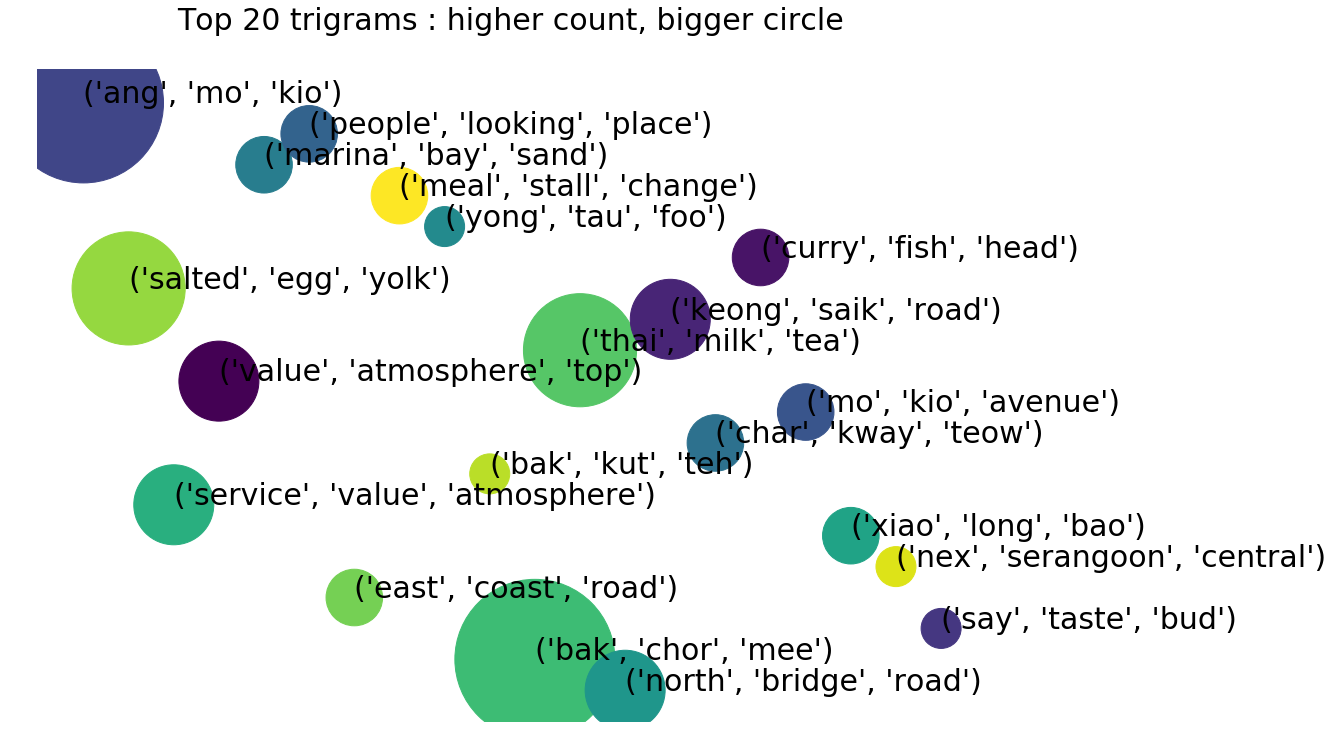

In [169]:
# calculate top 20 trigrams
t = [tuple(map(str,x)) for x in tkeys[:20]]
x = range(len(t))
y = range(len(t))
random.shuffle(y)
s = [50*(2**(n/30)) for n in tvalues[:10]]

colour = np.arange(5,len(t)+5)
random.shuffle(colour)
fig = plt.figure(figsize=(17,12))
ax = fig.gca()
ax.scatter(x, y, s=s, c=colour)
ax.axis('off')
plt.title('Top 20 trigrams : higher count, bigger circle\n').set_fontsize(30)

for i, txt in enumerate(t):
    ax.annotate(txt, (x[i],y[i])).set_fontsize(30)
    
plt.show()

In [170]:
# create summary column from Details column using gensim summarizer
start = time.time()

summary = []
for i in range(len(df)):
    part = df['Word_count'][i]
    text = df['Details'][i][part:-part]
    clean_text = preprocess_text(text, fix_unicode=True, lowercase=False, transliterate=True, 
                                                no_numbers=False, no_urls=True, no_emails=True, no_phone_numbers=True, 
                                                no_currency_symbols=False, no_punct=False, no_accents=False)
    
    try:
        sum_text = summarize(clean_text, word_count=100)
    except:
        sum_text = clean_text
        
    sum_text = sum_text.replace('\n','').replace('/','').replace('[','').replace(']','').replace('>','').replace('<','')
    
    summary.append(sum_text)
    
end = time.time()
exe_time = (end-start)/60
print 'Time taken : ', exe_time, ' minutes'

Time taken :  1.91045206785  minutes


In [171]:
df.head()

,Title,Details,Date,Processed Summary,Processed Detail,Word_count,Summary
0,Great Deals That Reward You When Dining With P...,"Singapore might be known for many things, but ...","Oct 31st, 2017",great deal reward dining paradise group,known thing stand colourful scene flavour borr...,503,Others like their Crispy BBQ Honey Pork Bun ($...
1,10 Exciting Highlights at AccorHotels Food & W...,"\n AccorHotels, the largest and most prestigio...","Oct 31st, 2017",exciting highlight accorhotels wine festival,accorhotels largest prestigious hotel operator...,907,"During the festival from 4 to 12 November, mor..."
2,Man Man Unagi – Delicious Unagi that Received ...,Since the release of the Singapore Michelin Gu...,"Oct 30th, 2017",man man unagi delicious unagi received bib gou...,release michelin guide bib gourmand awardees q...,362,Each portion features a bed of rice topped wit...
3,Kopi More – Brewing Traditional Nanyang Kopi W...,"Since I first opened my eyes, and heart, to th...","Oct 29th, 2017",kopi brewing traditional nanyang kopi espresso...,opened eye heart world coffee going looking go...,145,"Well, he makes traditional Nanyang coffee usin..."
4,11 Finger-Licking-Good Biryanis That You Will ...,"In Indian culture, eating with your hands is a...","Oct 28th, 2017",fingerlickinggood biryani love,indian culture eating hand mark respect host s...,694,"I liked the generous serving of rice, and robu..."


In [172]:
df['Processed Detail'][0]

u'known thing stand colourful scene flavour borrowed global neighbour variety option packed little red dot adding diversity paradise group arm chinese culinary concept canton paradise classic cantonese fare nourishing soup base beauty pot explore familiar taste oriental cooking colourful variant member paradise gourmet reward pgr loyalty scheme reward member dine participating paradise group restaurant acquainted paradise group offer know right pgr slew memberexclusive discount celebrate 6th anniversary making attractive dine exciting host restaurant whats member pay maybank card receive worth rebate canton paradise reckon better way start spend lazy afternoon warming tummy piping hot dim sum canton paradise serf hong kong classic egg tart siew mai milk tea steal heart like steamed molten salted egg yolk custard piggy bun 3pcs taste good look liked bbq combination variety bbq pork belly honey sauce crackling pork belly crispy roasted irish duck generous cut perfect meattofat ratio like

In [173]:
df['Details'][0][504:-504]

u'ho are members of Paradise Gourmet Rewards (PGR) \u2013 a loyalty scheme that reward members when they dine at participating Paradise Group restaurants \u2013 should already be well acquainted with what Paradise group has to offer. What they might not know is that from right now, PGR has a slew of member-exclusive discounts to celebrate their 6th anniversary, making it even more attractive to dine at their exciting host of restaurants. What\u2019s more, members who pay with Maybank Cards will receive an additional 2.5% worth of rebates. \xa0 Canton Paradise We reckon that there\u2019s no better way to start your day, or spend a lazy afternoon, than warming your tummy with some piping hot dim sum. Canton Paradise serves up all the Hong Kong classics such as egg tarts, siew mai, and milk tea. But none will steal your heart like the Steamed Molten Salted Egg Yolk Custard Piggy Bun ($6.80 for 3pcs), which tastes as good as it looks. We also liked the BBQ Combination (3 Varieties) ($28.80

In [174]:
summary[0]

u"Others like their Crispy BBQ Honey Pork Bun ($6.80 for 3pcs), silky smooth Handmade Meatball Congee ($9.80), and Signature Canton Jumbo Prawn Wanton Noodle ($11.80 with 4pcs) should not be missed as well.Those who prefer soup-based noodles will be delighted by LeNu's two signature broth: the collagen-rich pork bone broth, or the hearty braised beef broth.But don't just limit yourself to one soup base - go for the quart pot to enjoy four of their wholesome broths, such as the Spicy Nourishing Broth made from pork bones, Cooling Coconut Broth, and the Herbal Drunken Chicken Broth."

In [175]:
df['Summary'] = summary

In [176]:
df.head()

,Title,Details,Date,Processed Summary,Processed Detail,Word_count,Summary
0,Great Deals That Reward You When Dining With P...,"Singapore might be known for many things, but ...","Oct 31st, 2017",great deal reward dining paradise group,known thing stand colourful scene flavour borr...,503,Others like their Crispy BBQ Honey Pork Bun ($...
1,10 Exciting Highlights at AccorHotels Food & W...,"\n AccorHotels, the largest and most prestigio...","Oct 31st, 2017",exciting highlight accorhotels wine festival,accorhotels largest prestigious hotel operator...,907,"During the festival from 4 to 12 November, mor..."
2,Man Man Unagi – Delicious Unagi that Received ...,Since the release of the Singapore Michelin Gu...,"Oct 30th, 2017",man man unagi delicious unagi received bib gou...,release michelin guide bib gourmand awardees q...,362,Each portion features a bed of rice topped wit...
3,Kopi More – Brewing Traditional Nanyang Kopi W...,"Since I first opened my eyes, and heart, to th...","Oct 29th, 2017",kopi brewing traditional nanyang kopi espresso...,opened eye heart world coffee going looking go...,145,"Well, he makes traditional Nanyang coffee usin..."
4,11 Finger-Licking-Good Biryanis That You Will ...,"In Indian culture, eating with your hands is a...","Oct 28th, 2017",fingerlickinggood biryani love,indian culture eating hand mark respect host s...,694,"I liked the generous serving of rice, and robu..."


In [177]:
df.to_pickle('combined_blogs.pickle')